In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_x1 = pd.read_csv("./X_train.csv", sep=",")
df_x2 = pd.read_csv("./X_test.csv", sep=",")
df_x1 = df_x1.drop("最多風向", axis=1) #風向の数値化の仕方が分かりませんでした…
df_x2 = df_x2.drop("最多風向", axis=1)
df_y = pd.read_csv("./y_train.csv")
y1 = pd.DataFrame({'0.0':0.0}, index =[0]) #初めの数値0.0がタイトル扱いのため、無理やり追加
df_y = pd.concat([y1, df_y]).reset_index(drop = True)

display(df_x1.head(5))
display(df_x2.head(5))
display(df_y.head(5))

,平均気温,最高気温,最低気温,降水量の合計,平均風速,最大風速,最大瞬間風速,平均蒸気圧,平均湿度,最小相対湿度,平均現地気圧,平均海面気圧,最低海面気圧
0,22.4,23.6,20.3,0.0,2.8,5.0,7.6,18.3,67,56,1013.9,1016.7,1015.2
1,18.2,21.3,14.9,6.5,2.8,5.3,9.8,16.2,78,63,1016.9,1019.8,1017.5
2,25.8,31.1,22.3,0.0,2.7,5.3,10.4,25.9,79,52,1006.5,1009.3,1004.7
3,18.4,23.0,16.2,0.0,2.8,5.2,9.4,16.7,80,53,1018.5,1021.4,1017.5
4,25.7,29.6,23.0,0.0,1.8,3.5,5.6,26.6,81,64,1015.6,1018.4,1016.7


,平均気温,最高気温,最低気温,降水量の合計,平均風速,最大風速,最大瞬間風速,平均蒸気圧,平均湿度,最小相対湿度,平均現地気圧,平均海面気圧,最低海面気圧
0,23.3,25.2,20.7,209.5,5.5,17.8,41.5,28.0,98,70,990.7,993.5,966.8
1,25.2,29.7,21.4,0.0,2.2,4.2,7.8,22.2,70,38,1013.6,1016.3,1013.9
2,20.0,25.0,17.3,7.0,2.3,4.4,7.9,18.4,79,58,1018.5,1021.4,1017.4
3,26.0,30.7,20.4,3.5,5.5,11.7,21.4,28.3,85,69,1005.1,1007.9,1004.3
4,29.1,33.3,25.3,8.5,3.1,6.1,12.2,32.6,82,64,1008.9,1011.6,1004.6


,0.0
0,0.0
1,0.0
2,10.6
3,2.6
4,0.5


In [5]:
from sklearn .decomposition import PCA

n = np.size(x)
x_t = df_x1.values
y = df_y.values

pca = PCA(n_components =1)
x = pca.fit_transform(x_t)

nx = np.size(x)
ny = np.size(y)

sum_x = np.sum(x)
sum_y = np.sum(y)

res = []

In [6]:
class MyRegression:
    def __init__(self):
        pass

    def find_sum(l, p):
        z = 0

        for i in l:
            z += i**p
        
        return z

    def find_mul_sum(l1, l2):
        z = 0

        for i in range(len(l1)):
            z += (l1[i-1]*l2[i-1])
        return z

    def solve_equ(sum_x, sum_x2, sum_y, sum_xy):
        z = []
        
        p = np.array([[sum_x,n], [sum_x2,sum_x]], dtype='float64')
        q = np.array([sum_y, sum_xy], dtype='float64')

        z = np.linalg.solve(p, q) #[coef1, intercept1] , [coef2, intercept2], ...

        return z

    def predict(x, res):
        y_pred = []

        for i in x:
            y_pred.append(res[0] * i + res[1]) #res[0] = coef, res[1] = intercept

        return y_pred

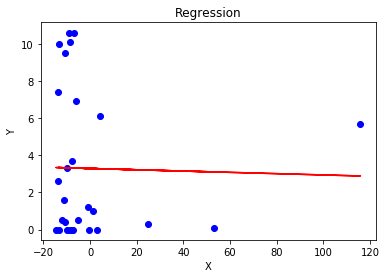

In [7]:
if __name__ == "__main__":
    clf = MyRegression
    sum_x2 = clf.find_sum(x, 2)
    sum_xy = clf.find_mul_sum(x, y)

    res = clf.solve_equ(sum_x, sum_x2, sum_y, sum_xy)
    y_pred = clf.predict(x, res)
    
    plt.title('Regression')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(x, y, color = 'blue')
    plt.plot(x, y_pred, color = 'red')
   
    plt.show()